In [277]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
from scipy import linalg
from scipy import fft
from scipy import io

np.random.seed(123)

In [278]:
class SimulatedIEEEMic:
    fdev = 15000
    fm = 3900

    def get_sig(self, N, fs, fc):
        n = np.arange(N)
        t = n / fs
        if fc is None:
            fc = fs / 4.
        ph0 = np.random.random() * 2. * np.pi
        ph = ph0 + 2.0 * np.pi * fc * t + self.fdev / self.fm * np.cos(
            2.0 * np.pi * self.fm * t)
        x = np.cos(ph)
        return x

    def get(self, N, fs, dB, fc=None):
        if dB is None:
            x = np.zeros(N)
        else:
            x = self.get_sig(N, fs, fc)
            x /= np.std(x)
            x *= 10.**(dB / 10.)
        return x

    def noise(self, N, dB):
        A = 10.**(dB / 20.)
        x = np.random.normal(loc=0, scale=A, size=N)
        return x

In [279]:
def round_power2(num):
    return int(np.power(2., np.ceil(np.log2(num))))


def signal_power(x):
    return np.var(x)
    return sum(abs(sig)**2.0)/N

def signal_power_dB(x):
    return 10. * np.log10(signal_power(x))


def snr(a, b):
    return signal_power(a) / signal_power(b)


def snr_dB(a, b):
    return 10. * np.log10(snr(a, b))

In [280]:
def mic_sig(n, fs, fc, fm, fd, dB=0.):
    t = np.arange(n) / fs
    x = np.exp(1.j *
               (2. * np.pi * fc * t + fd / fm * np.sin(2. * np.pi * fm * t)))
    x /= np.std(x)
    x *= 10.**(dB / 20.)
    return x

In [281]:
def awgn(n, dB=0.):
    w = 10.**(dB / 10.)
    d = stats.multivariate_normal(mean=[0., 0.],
                                  cov=[[.5 * w, 0.], [0., .5 * w]])
    x = d.rvs(size=n).view(np.complex128).reshape(N)
    return x

In [282]:
N = round_power2(1e5)
fs = int(1e6)
fc = 0.
fd = 15000.
fm = 3900.

# mic1 = SimulatedIEEEMic()
# sig1 = mic1.get(N, fs, dB=0.)

sig = mic_sig(N, fs, fc=fc, fm=fm, fd=fd, dB=0.)
noise = awgn(N, dB=10.)
both = sig + noise

print('Signal power: %5.2f dB' % (signal_power_dB(sig)))
print('Noise power: %5.2f dB' % (signal_power_dB(noise)))
print('SNR: %5.2f dB' % (snr_dB(sig, noise)))

Signal power:  0.00 dB
Noise power:  9.98 dB
SNR: -9.98 dB


In [283]:
# Matplotlib Method

# plt.specgram(noise, NFFT=1024, Fs=fs, scale='dB', noverlap=0, mode='psd', window=signal.get_window('hann', 1024))
# plt.title("PSD")
# plt.xlabel("Time")
# plt.ylabel("Frequency")
# plt.show()

# plt.specgram(sig, NFFT=1024, Fs=fs, scale='dB', noverlap=0, mode='psd', window=signal.get_window('hann', 1024))
# plt.title("PSD")
# plt.xlabel("Time")
# plt.ylabel("Frequency")
# plt.show()

# plt.specgram(both, NFFT=1024, Fs=fs, scale='dB', noverlap=0, mode='psd', window=signal.get_window('hann', 1024))
# plt.title("PSD")
# plt.xlabel("Time")
# plt.ylabel("Frequency")
# plt.show()

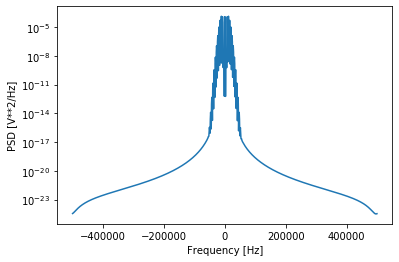

In [284]:
# Welch (Periodigram with averaging and overlap, which is currently 0)

# f, Pxx_den = signal.welch(noise, fs, nperseg=1024, noverlap=0, window='hann', scaling='density', detrend=False)
# plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

f, Pxx_den = signal.welch(sig, fs, nperseg=1024, noverlap=0, window='hann', scaling='density', detrend=False)
plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

# f, Pxx_den = signal.welch(both, fs, nperseg=1024, noverlap=0, window='hann', scaling='density', detrend=False)
# plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

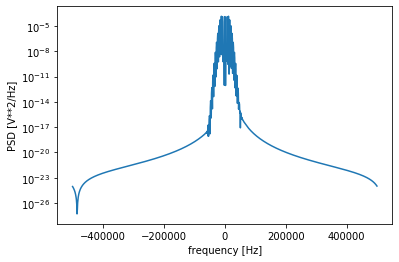

1.193500983407178

In [285]:
# Periodigram

# f, Pxx_den = signal.periodogram(noise, fs, window='hann', nfft=1024, scaling='density', detrend=False)
# plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
# plt.xlabel('frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

f, Pxx_den = signal.periodogram(sig, fs, window='hann', nfft=1024, scaling='density', detrend=False)
plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

# f, Pxx_den = signal.periodogram(both, fs, window='hann', nfft=1024, scaling='density', detrend=False)
# plt.semilogy(fft.fftshift(f), fft.fftshift(Pxx_den))
# plt.xlabel('frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()

df = f[1] - f[0] 
np.sum(Pxx_den) * df

In [286]:
def get_psd

SyntaxError: invalid syntax (<ipython-input-286-ae4544413608>, line 1)

In [ ]:
f = fft.fftshift(fft.fftfreq(N, 1/fs))
x = fft.fftshift(fft.fft(sig))

power_sig_time = signal_power(sig)
energy_sig_time_from_power_sig_time = power_sig_time * N * 1./fs

print('Signal power in time %8.6f' % (power_sig_time))
print('Signal energy in time from signal power in time %8.6f' % (energy_sig_time_from_power_sig_time))

energy_sig_time = np.sum(np.abs(sig)**2.) / fs
# energy_sig_freq = np.sum(np.abs(x)**2.) / (N * fs)
energy_sig_freq = np.sum(np.abs(x)**2.) / (N **2)

print('Signal energy in time %8.6f' % (energy_sig_time))
print('Signal energy in freq %8.6f' % (energy_sig_freq))

plt.semilogy(f, np.abs(x)**2.)
plt.show()